<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Principle Component Analysis (PCA)
PCA is a method in data science that reduces the dimensionality of a dataset. It does this by projecting each sample in the dataset onto its first few principal components while still preserving the data's variance. However, before diving into this, one must first learn about Singular Value Decomposition, an integral part of PCA.



## Singular Value Decomposition (SVD)

SVD's basic mechanics are that it decomposes a matrix into three matrices, formally denoted as:

Let $A$ be an $m \times n$ matrix. SVD expresses $A$ as a product of three matrices:
$
A = U \Sigma V^T
$
Where:
- **$U$** is an $m \times m$ orthogonal matrix containing the **left singular vectors**.
- **$\Sigma$** is an $m \times n$ diagonal matrix whose diagonal entries are the **singular values** $ \sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r \geq 0 $.
- **$V^T$** is the transpose of an $n \times n$ orthogonal matrix containing the **right singular vectors**.

#### Properties:
- The **singular values** $ \sigma_i $ are the square roots of the eigenvalues of $A^T A$. They measure the variance of each singular vector in the matrix, which represents their importance to the matrix.
- The **left singular vectors**, which are columns of $U$, are eigenvectors of $A A^T$. They represent the relationships between the rows of $A$ or the column space of $A$.
- The **right singular vectors**, which are columns of $V$, are eigenvectors of $A^T A$. They represent the relationships between the columns or the row space of $A$.
- $U$ and $V$ are **orthogonal** matrices.
- Taking the rank of A gives the total number of non-zero singular values, given the amount of independent dimensions of a matrix, denoted as r.
- $\Sigma$ has diagonal entries that represent the first $r$ independent dimensions of the matrix.

#### Supporting Theorems:
The following theorem, theorem 1.4.1, supports taking the rank of A gives the total number of non-zero singular values, given the amount of independent dimensions of a matrix.

Theorem 1.4.1:
If an $m \times n$ matrix $A$ has $r$ nonzero singular values, $ \sigma_1, \sigma_2, \dots, \sigma_r \geq 0 $ with $\sigma_{r+1} = \dots = \sigma_{n} = 0 $, then the dimension of $\text{col}(A) = r $

Furthermore, theorem 1.4.2 supports, The Singular Value Decomposition theorem, that there exist an SVD for every matrix.


It is apparent why SVD is important in dimensionality reduction. If we can represent every matrix in three components, with one of those representing the overall variance of each dimension, we can ultimately reduce dimensions by removing those that do not have high variance.




In [ ]:
import numpy as np

A = np.random.rand(5, 3)

print("A:\n", A)

U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

Sigma_matrix = np.diag(Sigma)  # Convert singular values into a diagonal matrix

reconstructed_A = U @ Sigma_matrix @ Vt

print(f"After SVD:\n {reconstructed_A}")



A:
 [[0.52227059 0.03582323 0.33453346]
 [0.0014078  0.84180191 0.02851735]
 [0.47652875 0.18321506 0.84829827]
 [0.87416979 0.24424237 0.64453432]
 [0.15915123 0.45360983 0.04785912]]
After SVD:
 [[0.52227059 0.03582323 0.33453346]
 [0.0014078  0.84180191 0.02851735]
 [0.47652875 0.18321506 0.84829827]
 [0.87416979 0.24424237 0.64453432]
 [0.15915123 0.45360983 0.04785912]]
Error: 1.8809938697124834e-15


## Low-Rank Matrix Approximations
Low-Rank Matrix approximation is a tool that reduces dimensionality of a matrix by representing the matrix in terms of its highest variant singular values. Before diving into this method a key concept is **matrix norms** which is the difference between two matrixes. Specifically, the induced norm or  **2-norm** of a matrix is its highest singular value. This is mathematically expressed as:
$
||A||_2 = \max_{\mathbf{x} \neq 0} \frac{||A \mathbf{x}||}{||\mathbf{x}||} = \max_{x \neq 0} \frac{||Ax||}{||x||} = \max_{x \neq 0} \sqrt{x^T A^T A x}
$

Futhermore, another key part is that every matrix can be broken down into $A = U \Sigma V^T$ but this can be further broken down into:

$
A = \sum_{j=1}^{r} \sigma_j u_j v_j^T
$

This leads us to the general gist of Low-Ran Matrix approximations, we could break down the matrix further by creating a truncating matrix and making a matrix $A_k$, representing it by its highest singular values. This is formally written as:


For $ k < r $, truncate the sum at the $ k $-th term:

$
A_k = \sum_{j=1}^{k} \sigma_j u_j v_j^T
$
#### Supporting lemmas and theorems:
**Lemma 1.4.4 (Matrix Norms and Singular Values)**, formally written as $ ||A - A_k||_2 = \sigma_{k+1} $ says that the difference between the rank approximation of a matrix and the original matrix is the values after the trancacuted form gets cut off. Further cementing its oprixmation based on the highest singular values.


**Theorem 1.4.5 (Eckart-Young-Mirsky Theorem)**, formally written as $ ||A - A_k||_2 \leq ||A - B||_2 $ states that  truncating SVD is the best possible approximation of A in a lower dimensional representation


In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD


A = np.random.rand(5, 3)
k = 2  # Rank of the approximation

# TruncatedSVD to keeping the  top k singular values
svd = TruncatedSVD(n_components=k)

# Perform SVD to get the truncated U_k and Sigma_k
U_k = svd.fit_transform(A)

# Retrieve right singular vectors
V_k = svd.components_

# Compute the low-rank approximation A_k
A_k = np.dot(U_k, V_k)

# Print the original matrix A
print("Original Matrix A:\n", A)

# Print the low-rank approximation A_k
print(f"\nLow-Rank Approximation A_k (Rank {k}):\n", A_k)

# Compute and print the 2-norm error between A and A_k
error = np.linalg.norm(A - A_k, ord=2)
print(f"\n 2-norm error: {error}")


Original Matrix A:
 [[0.92157516 0.93362285 0.89324413]
 [0.02618489 0.32514722 0.72626074]
 [0.24919514 0.97166595 0.75181918]
 [0.40211015 0.34635971 0.10646387]
 [0.67600012 0.73327059 0.47859168]]

Low-Rank Approximation A_k (Rank 2):
 [[ 0.86813383  1.03776752  0.8178195 ]
 [-0.03531493  0.44499599  0.63946274]
 [ 0.33510169  0.80425416  0.87306372]
 [ 0.42016801  0.31116916  0.1319499 ]
 [ 0.6874162   0.7110233   0.49470382]]

 2-norm error: 0.31349093111161974


### Principal Component Analysis (PCA)
Now, let's jump into the application of these concepts. PCA is a method to transform data into a lower-dimensional space, and it is done by the following steps:

First, the sample mean of the data is calculated, representing the center point of the data, and then subtracted from the original samples. This is known as the Mean-Deviation form. This effectively centers the data at the origin.



In [ ]:
# Lets say that we have a dataset on wine
# This dataset contains 178 samples of wine, each with 13 features
# The features include the alcohol content, malic acid content, ash content, etc.
# Lets try to represent the different types of wine in 2 features, for a easier determination of the wine type
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = wine.data    # Features (178 samples, 13 features)
y = wine.target  # Labels (wine types)

print("Wine dataset shape:", X.shape)


Wine dataset shape: (178, 13)


In [ ]:
import matplotlib.pyplot as plt
# sample mean of the features
mean = np.mean(X, axis=0)

# mean-deviation form of the data
X_centered = X - mean



Centered data point after mean-deviation: [ 1.22938202e+00 -6.26348315e-01  6.34831461e-02 -3.89494382e+00
  2.72584270e+01  5.04887640e-01  1.03073034e+00 -8.18539326e-02
  6.99101124e-01  5.81910118e-01  8.25505618e-02  1.30831461e+00
  3.18106742e+02]


The next step is to get the **sample co-variance of the data** . Formally denoted as,
In the provided image, the equation for the **sample covariance matrix** is:

$
S = \frac{1}{N-1} B B^T
$

Where:

- $ S $ is the **covariance matrix**.
- $ N $ is the number of data points.
- $ B $ is the matrix of data points, each column now being centered


This will capture the variance between each feature in the dataset. It is important to note that $B B^T$ is a positive semi-definite. The whole goal of PCA is to find the orthonormal vectors that maximize the variance also know as the principle components. We can express this in terms of eigenvalues. We want to find the largest eigenvectors of the sample covariance matrix. Lastly, the total variance of the data is captured by the sum of all the eigenvalues of S showing how many principle components to take to keep the overall variance of the data.


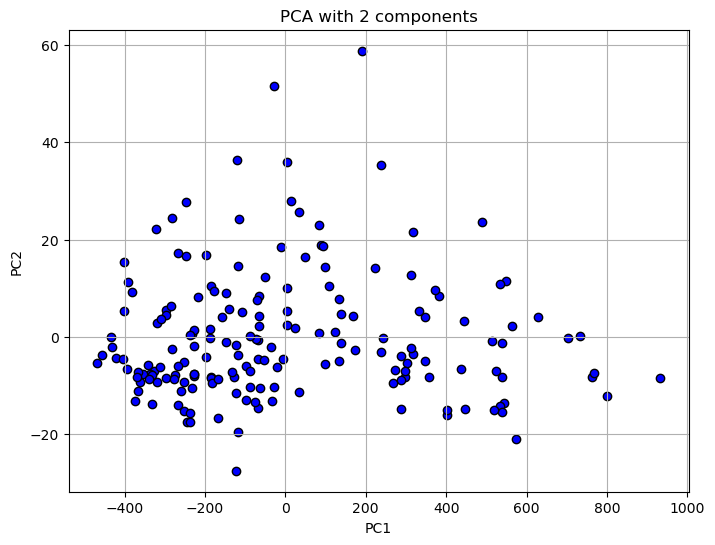

In [ ]:
# Covariance matrix of the centered data
cov_matrix = np.cov(X_centered, rowvar=False)

# Perform eigen-decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto the principal components
X_pca = np.dot(X_centered, eigenvectors)

# Select the number of components
n_components = 2
X_reduced = X_pca[:, :n_components]

# Plot the reduced data (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', marker='o', edgecolor='k')
plt.title(f"PCA with {n_components} components")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()